# BlackMarble class

The `BlackMarble` class inherits the [`Exposures`](climada_entity_Exposures.ipynb#Exposures-class) class and it is used to approximate economic exposure. This class models exposures of countries and provinces by interpolating GDP and income group values through the nightlight intensities of a specific year.

# Input data:
The used nightlight images are the following:
- from 2012 to 2016: https://earthobservatory.nasa.gov/Features/NightLights (15 arcsec resolution (~500m))
- from 1992 to 2013: https://ngdc.noaa.gov/eog/dmsp/downloadV4composites.html (30 arcsec resolution (~1km), stable lights)

By default, for years higher than 2013 the NASA images are used, whilst for 2013 and earlier years the NOAA ones are considered. However, there is a flag which allows to choose the closest NASA or NOAA images. The default resolution is that of the image, but any resolution can be set and will be computed by interpolation.

Regarding GDP (nominal GDP at current USD) and income group values, they are obtained from the [World Bank](https://data.worldbank.org) using the [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) API. If a value is missing, the value of the closest year is considered. When no values are provided from the World Bank, we use the [Natural Earth](https://www.naturalearthdata.com) repository values.

# Import BlackMarble()

In [15]:
%matplotlib inline
from climada.entity import BlackMarble

# Possible settings

The class provides a `set_countries()` method which enables to model a country using different settings. The first time a nightlight image is used, it is downloaded and stored locally. This might take some time.

Let's look into `set_countries()`: 

In [16]:
bm = BlackMarble()
bm.set_countries?

Signature:
bm.set_countries(
    countries,
    ref_year=2016,
    res_km=None,
    from_hr=None,
    admin_file='admin_0_countries',
    **kwargs,
)
Docstring:
Model countries using values at reference year. If GDP or income
group not available for that year, consider the value of the closest
available year.

Parameters:
    countries (list or dict): list of country names (admin0 or subunits)
        or dict with key = admin0 name and value = [admin1 names]
    ref_year (int, optional): reference year. Default: 2016
    res_km (float, optional): approx resolution in km. Default:
        nightlights resolution.
    from_hr (bool, optional): force to use higher resolution image,
        independently of its year of acquisition.
    admin_file (str): file name, admin_0_countries or admin_0_map_subunits
    kwargs (optional): 'gdp' and 'inc_grp' dictionaries with keys the
        country ISO_alpha3 code. 'poly_val' list of polynomial coefficients
        [1,x,x^2,...] to apply to nightlig

The only required parameter is:
- countries: countries to model

Optional parameters are:
- ref_year: year for which exposure is modeled
- res_km: resolution of the exposure layer
- from_hr: whether to use higher resolution (i.e. NASA data) regardless the specified year
- admin_file: whether to model soveregin states or also subunits as described in https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/
- kwargs: it allows the user to specify GDP and income group data to a given country (group of countries). These should be input as dictionaries of the form gdp = {country1_ISO3_code: gdp1, .., countryn_ISO3_code: gdpn} and inc_grp = {country1_ISO3_code: inc_grp1, .., countryn_ISO3_code: inc_grpn}

## Modeling exposure of Sovereign States

As an example, let's model Switzerland in the year 2010. We need to pass the full country name. When a country name is mispelled, an error is raised with the list of possible names.

In [17]:
# Note: execution of this cell will fail
ch_2010 = BlackMarble()
ch_2010.set_countries(['Swizerland'], ref_year=2010)

2021-02-15 10:17:19,208 - climada.entity.exposures.black_marble - ERROR - Country Swizerland not found. Possible options: ['Indonesia', 'Malaysia', 'Chile', 'Bolivia', 'Peru', 'Argentina', 'Dhekelia Sovereign Base Area', 'Cyprus', 'India', 'China', 'Israel', 'Palestine', 'Lebanon', 'Ethiopia', 'South Sudan', 'Somalia', 'Kenya', 'Pakistan', 'Malawi', 'United Republic Of Tanzania', 'Syria', 'Somaliland', 'France', 'Suriname', 'Guyana', 'South Korea', 'North Korea', 'Morocco', 'Western Sahara', 'Costa Rica', 'Nicaragua', 'Republic Of The Congo', 'Democratic Republic Of The Congo', 'Bhutan', 'Ukraine', 'Belarus', 'Namibia', 'South Africa', 'Saint Martin', 'Sint Maarten', 'Oman', 'Uzbekistan', 'Kazakhstan', 'Tajikistan', 'Lithuania', 'Brazil', 'Uruguay', 'Mongolia', 'Russia', 'Czechia', 'Germany', 'Estonia', 'Latvia', 'Norway', 'Sweden', 'Finland', 'Vietnam', 'Cambodia', 'Luxembourg', 'United Arab Emirates', 'Belgium', 'Georgia', 'Macedonia', 'Albania', 'Azerbaijan', 'Kosovo', 'Turkey', 'Sp

ValueError: 

In [18]:
ch_2010 = BlackMarble()
ch_2010.set_countries(['Switzerland'], ref_year=2010)

2021-02-15 10:17:53,670 - climada.util.finance - INFO - GDP CHE 2010: 5.838e+11.
2021-02-15 10:17:53,765 - climada.util.finance - INFO - Income group CHE 2010: 4.
2021-02-15 10:17:53,765 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 2010.
2021-02-15 10:17:54,436 - climada.entity.exposures.black_marble - INFO - Processing country Switzerland.
2021-02-15 10:17:54,600 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.


C:\Users\aleciu\Documents\GitHub\climada_python\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


C:\Users\aleciu\Anaconda3\envs\climada_env\lib\site-packages\cartopy\mpl\feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


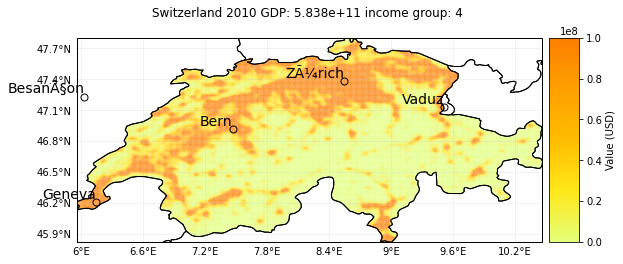

In [19]:
ch_2010.plot_hexbin(vmax=1e8)

From the log we can see that the resolution of the created exposure is 1 km. We can change that:

2021-02-15 10:18:08,821 - climada.util.finance - INFO - GDP CHE 2010: 5.838e+11.
2021-02-15 10:18:08,932 - climada.util.finance - INFO - Income group CHE 2010: 4.
2021-02-15 10:18:08,934 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 2010.
2021-02-15 10:18:09,216 - climada.entity.exposures.black_marble - INFO - Processing country Switzerland.
2021-02-15 10:18:09,346 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 0.5 km.


C:\Users\aleciu\Documents\GitHub\climada_python\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


C:\Users\aleciu\Anaconda3\envs\climada_env\lib\site-packages\cartopy\mpl\feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


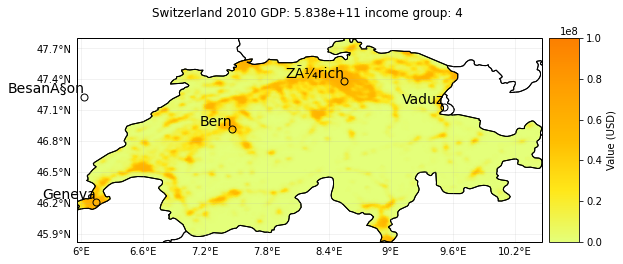

In [20]:
ch_2010_05 = BlackMarble()
ch_2010_05.set_countries(['Switzerland'], ref_year=2010, res_km=0.5)
ch_2010_05.plot_hexbin(vmax=1e8)

Let's now see what happens when the flag _'from_hr'_ is set to True:

2021-02-15 10:18:29,714 - climada.util.finance - INFO - GDP CHE 2010: 5.838e+11.
2021-02-15 10:18:29,854 - climada.util.finance - INFO - Income group CHE 2010: 4.
2021-02-15 10:18:29,856 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2012.
2021-02-15 10:18:45,264 - climada.entity.exposures.black_marble - INFO - Processing country Switzerland.
2021-02-15 10:18:45,930 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 0.5 km.


C:\Users\aleciu\Documents\GitHub\climada_python\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


C:\Users\aleciu\Anaconda3\envs\climada_env\lib\site-packages\cartopy\mpl\feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


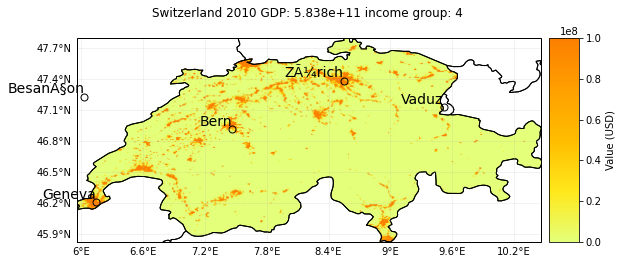

In [21]:
ch_2010_hr = BlackMarble()
ch_2010_hr.set_countries(['Switzerland'], ref_year=2010, from_hr=True)
ch_2010_hr.plot_hexbin(vmax=1e8)

From the log of the last two generated exposures, one reads that both are generated at a resolution of 0.5 km and that GDP for both refers to the year 2010 (as required by the relative keyword argument). However, it is also clear that for the second exposure (i.e. with the _'from_hr'_ flag set to true) a NASA image for the year 2012 is used, which is the high resolution image for the year closest to the reference year (i.e. 2010).

To model more than one country, simply pass more countries' names:

2021-02-15 10:36:27,233 - climada.util.finance - INFO - GDP ARG 2013: 5.520e+11.
2021-02-15 10:36:27,336 - climada.util.finance - INFO - Income group ARG 2013: 3.
2021-02-15 10:36:27,797 - climada.util.finance - INFO - GDP URY 2013: 5.753e+10.
2021-02-15 10:36:27,897 - climada.util.finance - INFO - Income group URY 2013: 4.
2021-02-15 10:36:27,899 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 2013.
2021-02-15 10:36:28,149 - climada.entity.exposures.black_marble - INFO - Processing country Argentina.
2021-02-15 10:36:36,706 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.
2021-02-15 10:36:37,557 - climada.entity.exposures.black_marble - INFO - Processing country Uruguay.
2021-02-15 10:36:37,895 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.


C:\Users\aleciu\Documents\GitHub\climada_python\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


C:\Users\aleciu\Anaconda3\envs\climada_env\lib\site-packages\cartopy\mpl\feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


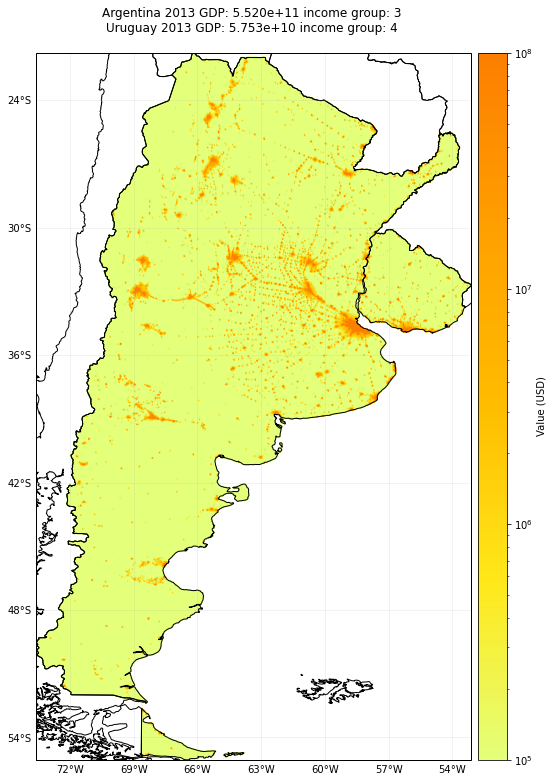

In [26]:
from matplotlib import colors

au = BlackMarble()
au.set_countries(['Argentina', 'Uruguay'], 2013, res_km=1.0)
norm=colors.LogNorm(vmin=1.0e5, vmax=1.0e8)
au.plot_hexbin(pop_name=False, norm=norm)

The user can apply her own gdp and income group values by passing a dictionary called _gdp_, with keys the countries iso-codes and values gdp values, and one called _inc_grp_, with keys the countries iso-codes and values income groups (from 1 to 4).

2021-02-15 10:38:04,507 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 2013.
2021-02-15 10:38:04,750 - climada.entity.exposures.black_marble - INFO - Processing country Argentina.
2021-02-15 10:38:13,399 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.
2021-02-15 10:38:14,302 - climada.entity.exposures.black_marble - INFO - Processing country Uruguay.
2021-02-15 10:38:14,649 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.


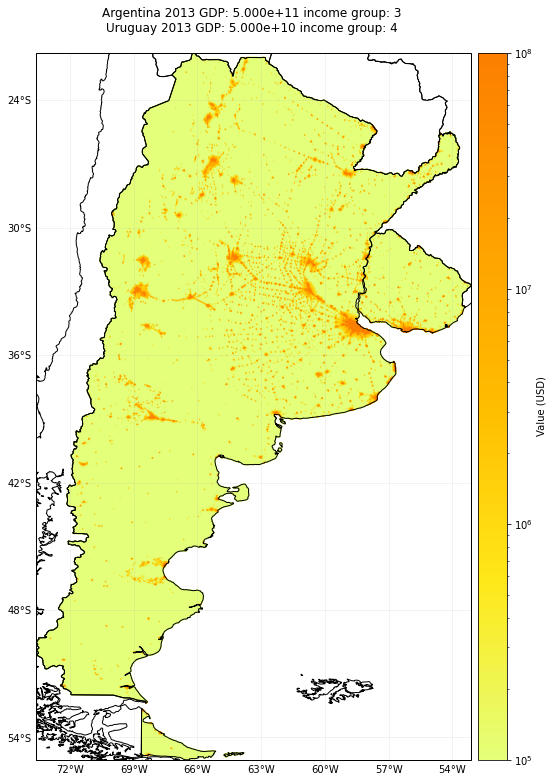

In [27]:
au = BlackMarble()
au.set_countries(['Argentina', 'Uruguay'], 2013, res_km=1.0, gdp={'ARG': 5e11, 'URY': 5e10}, inc_grp={'ARG': 3, 'URY': 4})
norm=colors.LogNorm(vmin=1.0e5, vmax=1.0e8)
au.plot_hexbin(pop_name=False, norm=norm)

## Model specific territories of Sovereign States

Regions, provinces, autonomous territories can also be modelled. For example, in order to model [first-order administrative boundaries](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-1-states-provinces/) of Germany and Czech Republic, one can do:

2021-02-15 10:39:42,488 - climada.util.finance - INFO - GDP DEU 2012: 3.527e+12.
2021-02-15 10:39:42,580 - climada.util.finance - INFO - Income group DEU 2012: 4.
2021-02-15 10:39:43,080 - climada.util.finance - INFO - GDP CZE 2012: 2.089e+11.
2021-02-15 10:39:43,174 - climada.util.finance - INFO - Income group CZE 2012: 4.
2021-02-15 10:39:43,174 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2012.
2021-02-15 10:40:00,515 - climada.entity.exposures.black_marble - INFO - Processing country Germany.
2021-02-15 10:40:04,810 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.
2021-02-15 10:40:05,645 - climada.entity.exposures.black_marble - INFO - Processing country Czechia.
2021-02-15 10:40:06,613 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.


C:\Users\aleciu\Documents\GitHub\climada_python\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


C:\Users\aleciu\Anaconda3\envs\climada_env\lib\site-packages\cartopy\mpl\feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


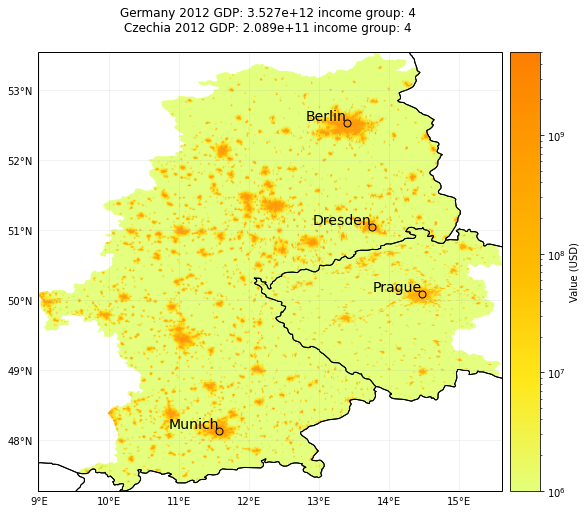

In [28]:
country_name = {'Germany': ['Berlin', 'Brandenburg', 'Bayern', 'Sachsen', 'ThÃ¼ringen', 'Sachsen-Anhalt'],
                'Czechia': ['Prague', 'KarlovarskÃ½', 'Ã\x9asteckÃ½', 'LibereckÃ½', 'StÅ\x99edoÄ\x8deskÃ½', 'PlzeÅ\x88skÃ½', 'JihoÄ\x8deskÃ½']}

ent = BlackMarble()
ent.set_countries(country_name, 2012, res_km=1.0, from_hr=True)

norm=colors.LogNorm(vmin=1.0e6, vmax=5.0e9)
ent.plot_hexbin(norm=norm)

As above, if the region's name is mispelled, a list with all possible regions' names for that country is provided:

In [29]:
# Note: execution of this cell will fail
ent = BlackMarble()
ent.set_countries({'Germany': ['']}, 2012, res_km=1.0, from_hr=True)

2021-02-15 10:40:31,404 - climada.entity.exposures.black_marble - ERROR -  not found. Possible provinces of DEU are: ['Sachsen', 'Bayern', 'Rheinland-Pfalz', 'Saarland', 'Schleswig-Holstein', 'Niedersachsen', 'Nordrhein-Westfalen', 'Baden-WÃ¼rttemberg', 'Brandenburg', 'Mecklenburg-Vorpommern', 'Bremen', 'Hamburg', 'Hessen', 'ThÃ¼ringen', 'Sachsen-Anhalt', 'Berlin']


ValueError: 

One can also model countries' subunits. This requires setting the admin_file argument to _'admin_0_map_subunits'_. Note that most likely in these cases both the gdp and inc_grp dicts must be passed.

In [51]:
fg = BlackMarble()
fg.set_countries(countries=['French Guiana'], gdp={'GUF': 5*1e9}, inc_grp={'GUF': 4}, admin_file='admin_0_map_subunits')

2021-02-15 10:58:44,618 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2016.
2021-02-15 10:58:58,119 - climada.entity.exposures.black_marble - INFO - Processing country French Guiana.
2021-02-15 10:58:58,698 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 0.5 km.


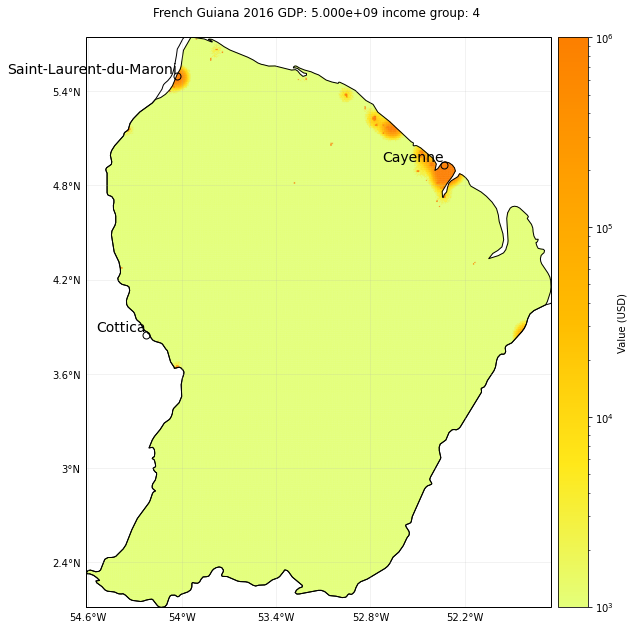

In [54]:
norm=colors.LogNorm(vmin=1.0e3, vmax=1.0e6)
fg.plot_hexbin(norm=norm)

## Change exponents of the polynomial transformation used for nighlight intensity:

One can also change the exponents of the polynomial transformation used in the nightlight intensity through the `poly_val` parameter. The default transformation is x^2 (i.e. poly_val = [0, 0, 1])

2021-02-15 10:46:49,884 - climada.util.finance - INFO - GDP CHE 2016: 6.713e+11.
2021-02-15 10:46:49,986 - climada.util.finance - INFO - Income group CHE 2016: 4.
2021-02-15 10:46:49,986 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2016.
2021-02-15 10:47:06,318 - climada.entity.exposures.black_marble - INFO - Processing country Switzerland.
2021-02-15 10:47:06,922 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 0.5 km.


C:\Users\aleciu\Documents\GitHub\climada_python\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


2021-02-15 10:47:24,209 - climada.util.finance - INFO - GDP CHE 2016: 6.713e+11.
2021-02-15 10:47:24,375 - climada.util.finance - INFO - Income group CHE 2016: 4.
2021-02-15 10:47:24,375 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2016.
2021-02-15 10:47:43,090 - climada.entity.exposures.black_marble - INFO - Processing country Switzerland.
2021-02-15 10:47:43,737 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 0.5 km.


C:\Users\aleciu\Documents\GitHub\climada_python\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


C:\Users\aleciu\Anaconda3\envs\climada_env\lib\site-packages\cartopy\mpl\feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


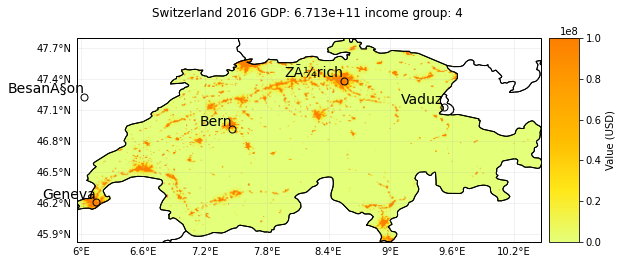

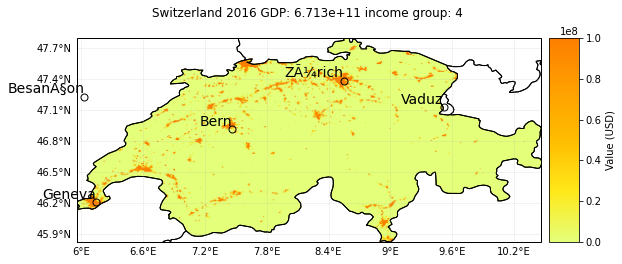

In [32]:
ch_pol_val = BlackMarble()
ch_pol_val.set_countries(['Switzerland'])
ch_pol_val.plot_hexbin(vmax=1e8)

ch_pol_val1 = BlackMarble()
ch_pol_val1.set_countries(['Switzerland'], poly_val=[0, 0, 0, 0, 1])
ch_pol_val1.plot_hexbin(vmax=1e8)